# IS460 Machine Learning & Applications - Data Preprocessing

## <i>Unravelling the Shift in Air Travel Preferences 🛫</i>

<u>Class Group No.:</u> G1<br>
<u>Student Group No.:</u> 5<br>
<u>Team Member Details:</u>
<table align='left'>
    <tr>
        <td><strong>Full Name</strong></td>
        <td><strong>Matriculation No.</strong></td>
    </tr>
    <tr>
        <td>Goh Nina Melda</td>
        <td>01445491</td>
    </tr>
    <tr>
        <td>Laetitia Hong Jae-ee</td>
        <td>01440359</td>
    </tr>
    <tr>
        <td>Leong Chong Gui</td>
        <td>01520030</td>
    </tr>
    <tr>
        <td>Ng Wei Lun Andrew</td>
        <td>01397857</td>
    </tr>
    <tr>
        <td>Sze Xin Wei</td>
        <td>01394966</td>
    </tr>
</table>

#

# Table of Contents
<table align='left'>
    <tr>
        <td><strong>No.</strong></td>
        <td><strong>Section Title</strong></td>
    </tr>
    <tr>
        <td align='center'>1</td>
        <td><a href='#1.-Dataset-Overview'>Dataset Overview</a></td>
    </tr>
    <tr>
        <td align='center'>2</td>
        <td><a href='#2.-Support-Vector-Machine'>Support Vector Machine</a></td>
    </tr>
</table>

#

# 1. Dataset Overview

The table below summarises the properties of the attributes of our data source (not in chronological order).<br><br>
<i><u>Source:</u> Vyshnia, G. (2023). Kaggle. <a href='https://www.kaggle.com/code/gvyshnya/airline-reviews-sentiments-ts-and-eda/input'>Link to dataset.</a></i>
<hr>

<table align='left' style='word-wrap: break-word'>
    <tr>
        <td><strong>Category</strong></td>
        <td><strong>Name</strong></td>
        <td><strong>Data Type</strong></td>
        <td><strong>Description</strong></td>
    </tr>
    <tr>
        <td rowspan='11'>Qualitative descriptive data</td>
        <td>Serial Number</td>
        <td>Integer</td>
        <td>Indication of row indices.</td>
    </tr>
    <tr>
        <td>Airline Name</td>
        <td>String</td>
        <td>Name of airline being reviewed.</td>
    </tr>
    <tr>
        <td>Review_Title</td>
        <td>String</td>
        <td>Title of user-generated review.</td>
    </tr>
    <tr>
        <td>Review Date</td>
        <td>String</td>
        <td>Date of review submission, with format DD% Month YYYY.</td>
    </tr>
    <tr>
        <td>Verified</td>
        <td>Boolean</td>
        <td>Binary indication of whether the reviewer is verified (represented as 'True'), or not (represented as 'False').</td>
    </tr>
    <tr>
        <td>Review</td>
        <td>String</td>
        <td>Detailed user-generated review of airline experience.</td>
    </tr>
    <tr>
        <td>Aircraft</td>
        <td>String</td>
        <td>Model of aircraft boarded by user.</td>
    </tr>
    <tr>
        <td>Type of Traveller</td>
        <td>String</td>
        <td>Categorical indication of purpose of travel, designated by the following unique values:
            <li>Business</li>
            <li>Couple Leisure</li>
            <li>Family Leisure</li>
            <li>Solo Leisure</li>
        </td>
    </tr>
    <tr>
        <td>Seat Type</td>
        <td>String</td>
        <td>Categorical indication of class of seating, designated by the following unique values:
            <li>First Class</li>
            <li>Business Class</li>
            <li>Premium Economy</li>
            <li>Economy Class</li>
        </td>
    </tr>
    <tr>
        <td>Route</td>
        <td>String</td>
        <td>Specific flight route, with the following format: [Departure Destination] to [Arrival Destination].</td>
    </tr>
    <tr>
        <td>Date Flown</td>
        <td>String</td>
        <td>Month and Year of flight.</td>
    </tr>
    <tr>
        <td rowspan='9'>Quantitative descriptive data</td>
        <td>Overall_Rating</td>
        <td>Integer</td>
        <td>Ordinal rating given by user, with values between the range of 1-10.</td>
    </tr>
    <tr>  
        <td>Seat Comfort</td>
        <td>Float</td>
        <td rowspan='7'>Ordinal rating ranging from 1.0 to 5.0.</td>
    </tr>
    <tr>
        <td>Cabin Staff Service</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Food & Beverages</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Ground Service</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Inflight Entertainment</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Wifi & Connectivity</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Value For Money</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Recommended</td>
        <td>String</td>
        <td>Binary indication of whether the user recommends the airline (represented as 'yes') or not (represented as 'no').</td>
    </tr>
</table>

<hr>
<i>Back to <a href='#Table-of-Contents'>Table of Contents</a></i>

#

# 2. Support Vector Machine
<hr>
<i>Back to <a href='#Table-of-Contents'>Table of Contents</a></i>

In [6]:
# Import necessary libraries and modules for data manipulation, preprocessing, and modeling

# To split data into training and testing sets
from sklearn.model_selection import train_test_split

# To standardize/scale the feature values
from sklearn.preprocessing import StandardScaler

# For Support Vector Machine (SVM) classifier
from sklearn import svm

# For evaluating model performance
from sklearn import metrics

# To calculate the F1-score metric
from sklearn.metrics import f1_score

# To visualise the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import functions to calculate the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC)
from sklearn.metrics import roc_curve, auc

# Import plt for plotting visualizations
import matplotlib.pyplot as plt

# To handle data as DataFrames (data manipulation)
import pandas as pd

# Load the pre-COVID dataset into a DataFrame
pre_covid_df = pd.read_csv('pre_covid_new.csv')

# Load the post-COVID dataset into a separate DataFrame
post_covid_df = pd.read_csv('post_covid.csv')


In [24]:
# Step 1: Select the features (X) from the pre-COVID dataset
X = pre_covid_df[['Overall_Rating', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                  'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money']]

# Step 2: Select the target variable (y) from the pre-COVID dataset (Recommended column)
y = pre_covid_df['Recommended']

# Step 3: Initialize the StandardScaler to standardize the features in X (to have mean=0 and std=1)
scaler = StandardScaler()

# Fit the scaler to the data (calculate mean and std), then transform X to the scaled values
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into training and testing sets (80% for training, 20% for testing)
# This helps evaluate the model on unseen data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=20)

# Step 5: Create an SVM (Support Vector Machine) classifier with a radial basis function (RBF) kernel
clf = svm.SVC(kernel="rbf")  # rbf Kernel for non-linear classification

# Step 6: Train the SVM model using the training data (X_train and y_train)
clf.fit(X_train, y_train)

# Step 7: Use the trained model to make predictions on the test data (X_test)
y_pred = clf.predict(X_test)

# Step 8: Print evaluation results for the model on pre-COVID data
print("Pre-COVID")

# Evaluate and print the accuracy of the model (percentage of correct predictions)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Evaluate and print the precision (the proportion of positive predictions that are correct)
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label=1.0))

# Evaluate and print the recall (the proportion of actual positives that were predicted correctly)
print("Recall:", metrics.recall_score(y_test, y_pred, pos_label=1.0))

# Evaluate and print the F1-Score (harmonic mean of precision and recall)
print("F1-Score:", metrics.f1_score(y_test, y_pred, pos_label=1.0))


Pre-COVID
Accuracy: 0.9720055071133548
Precision: 0.9731543624161074
Recall: 0.975609756097561
F1-Score: 0.9743805123897522


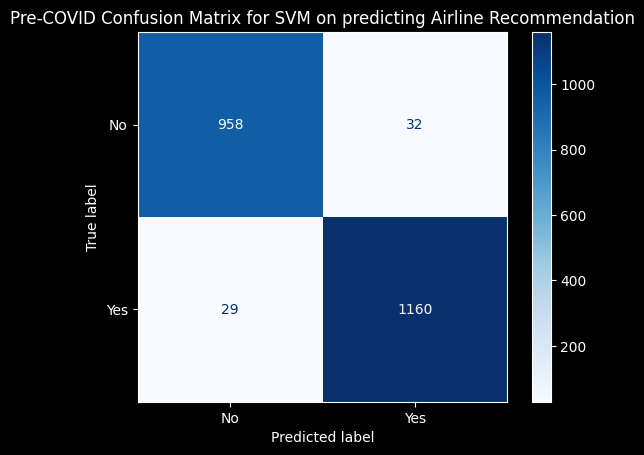

In [18]:
# Set the plot style to dark background
plt.style.use('dark_background')

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('Pre-COVID Confusion Matrix for SVM on predicting Airline Recommendation')
plt.show()


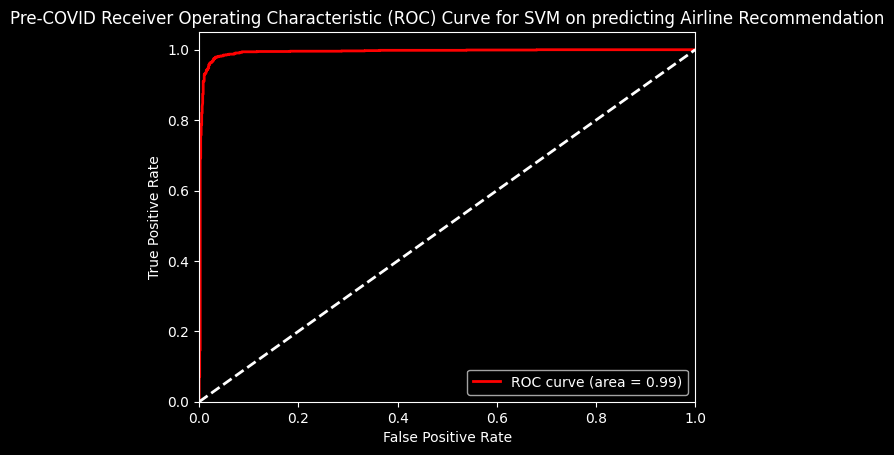

In [25]:
# Get the probability scores for the positive class
y_prob = clf.decision_function(X_test)  # For SVM

# Compute ROC curve and area under the curve (AUC)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='white', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Pre-COVID Receiver Operating Characteristic (ROC) Curve for SVM on predicting Airline Recommendation')
plt.legend(loc='lower right')
plt.show()

In [21]:
# Step 1: Select the features (X) from the Post-COVID dataset
X = post_covid_df[['Overall_Rating', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                   'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money']]

# Step 2: Select the target variable (y) from the Post-COVID dataset (Recommended column)
# Convert 'yes' to 1 and 'no' to 0 for binary classification
y = post_covid_df['Recommended']

# Step 3: Initialize the StandardScaler to standardize the features in X (to have mean=0 and std=1)
scaler = StandardScaler()

# Fit the scaler to the data (calculate mean and std), then transform X to the scaled values
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into training and testing sets (80% for training, 20% for testing)
# This helps evaluate the model on unseen data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=20)

# Step 5: Create an SVM (Support Vector Machine) classifier with a radial basis function (RBF) kernel
clf = svm.SVC(kernel="rbf")  # rbf Kernel for non-linear classification

# Step 6: Train the SVM model using the training data (X_train and y_train)
clf.fit(X_train, y_train)

# Step 7: Use the trained model to make predictions on the test data (X_test)
y_pred = clf.predict(X_test)

# Step 8: Print evaluation results for the model on post-COVID data
print("Post-COVID")

# Evaluate and print the accuracy of the model (percentage of correct predictions)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Evaluate and print the precision (the proportion of positive predictions that are correct)
print("Precision:", metrics.precision_score(y_test, y_pred))

# Evaluate and print the recall (the proportion of actual positives that were predicted correctly)
print("Recall:", metrics.recall_score(y_test, y_pred))

# Evaluate and print the F1-Score (harmonic mean of precision and recall)
print("F1-Score:", metrics.f1_score(y_test, y_pred))

Post-COVID
Accuracy: 0.9715465810004589
Precision: 0.9365079365079365
Recall: 0.9402390438247012
F1-Score: 0.9383697813121272


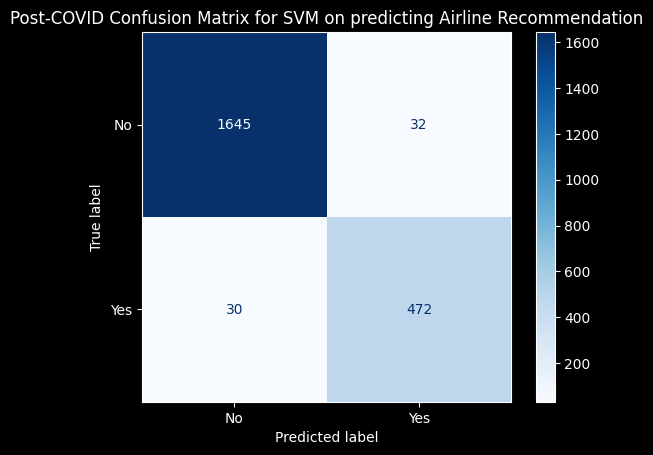

In [22]:
# Set the plot style to dark background
plt.style.use('dark_background')

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('Post-COVID Confusion Matrix for SVM on predicting Airline Recommendation')
plt.show()


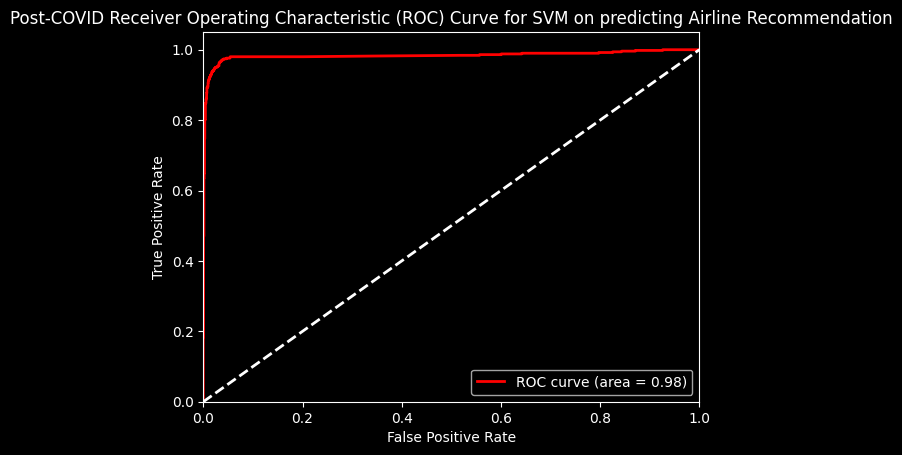

In [23]:
# Get the probability scores for the positive class
y_prob = clf.decision_function(X_test)  # For SVM

# Compute ROC curve and area under the curve (AUC)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='white', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Post-COVID Receiver Operating Characteristic (ROC) Curve for SVM on predicting Airline Recommendation')
plt.legend(loc='lower right')
plt.show()

<hr>
<i>Back to <a href='#Table-of-Contents'>Table of Contents</a></i><br><br>
<h4>End of script.</h4>